# Table of Contents

1. [Introduction](#Introduction)
    - [Overview of the Dataset](#Overview-of-the-Dataset)
    - [Objectives of the Analysis](#Objectives-of-the-Analysis)
2. [Data Loading](#Data-Loading)
    - [Importing Libraries](#Importing-Libraries)
    - [Loading the Dataset](#Loading-the-Dataset)
3. [Data Inspection](#Data-Inspection)
    - [Initial Data Exploration](#Initial-Data-Exploration)
    - [Data Information](#Data-Information)
    - [Summary Statistics](#Summary-Statistics)
    - [Missing Values](#Missing-Values)
    - [Duplicate Records](#Duplicate-Records)
4. [Data Transformation](#Data-Transformation)
    - [Feature Engineering](#Feature-Engineering)
5. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    - [Time-Series-Features-Enginnering](#Time-Series-Features-Enginnering)
6. [Conclusion](#Conclusion)
    - [Save Dataset for ML](#Save-Dataset-for-ML)
    - [Key Findings from the Analysis](#Key-Findings-from-the-Analysis)
    - [Insights and Observations](#Insights-and-Observations)


# Introduction

## Overview of the Dataset
<a id="Overview-of-the-Dataset"></a>
In this project, we aim to predict the electricity demand for the next 24 hours by analyzing past electricity demand data points along with various influencing factors such as humidity, temperature, dew point, and categorical drivers like weekdays and holidays. Accurate forecasting of electricity demand is crucial for optimizing energy production and distribution, ensuring a reliable supply, and minimizing operational costs.


## Objectives of the Analysis
<a id="Objectives-of-the-Analysis"></a>
The primary objective of this project is to develop a machine-learning model that can accurately forecast the electricity demand for a sample day in July or August. The forecast should achieve an accuracy of more than 95%, with an acceptable error rate of less than 5% (Absolute Error < 500 MW).

# Data Loading
## Importing Libraries

In [1]:
!pip install pandas numpy matplotlib seaborn holidays


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


## Importing Libraries
<a id="Importing-Libraries"></a>

In [2]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

## Loading the Dataset
<a id="Loading-the-Dataset"></a>


In [3]:
# Loading the Dataset
electricity_data = pd.read_csv("./data/Sample Dataset.csv")

# Data Inspection

## Initial Data Exploration
<a id="Initial-Data-Exploration"></a>


In [4]:
# Display the first few rows of the dataframe
electricity_data.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


## Data Information
<a id="Data-Information"></a>


In [5]:
# Display basic information about the dataframe
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


## Summary Statistics
<a id="Summary-Statistics"></a>


In [6]:
# Display summary statistics
electricity_data.describe()

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000


## Missing Values
<a id="Missing-Values"></a>


In [7]:
# Check for missing values
electricity_data.isnull().sum()

Date                 0
Weekday              0
Hour                 0
HOEP                 0
Ontario_Demand       0
Temperature          0
Windchill_Index      0
Wind_Speed           0
Humidex              0
Relative_Humidity    0
Dew_Point            0
Pressure_Station     0
dtype: int64

## Duplicate Records
<a id="Duplicate-Records"></a>

In [8]:
# Check for duplicates
print(electricity_data.duplicated().sum())

0


# Data Transformation

## Feature Engineering
<a id="Feature-Engineering"></a>


In [9]:
# Convert 'Date' column to datetime
electricity_data['Date'] = pd.to_datetime(electricity_data['Date'])

In [10]:
# Extract basic time features
electricity_data['DayOfWeek'] = electricity_data['Date'].dt.dayofweek
electricity_data['IsWeekend'] = electricity_data['DayOfWeek'].isin([5, 6]).astype(int)


In [11]:
# Create a feature for holidays in Ontario, Canada
ontario_holidays = holidays.CA(prov='ON', years=range(2016, 2021))

# Create the IsHoliday feature
electricity_data['IsHoliday'] = electricity_data['Date'].dt.date.isin(ontario_holidays).astype(int)

# Checking counts
electricity_data['IsHoliday'].value_counts()

IsHoliday
0    38478
1      930
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)
<a id="Exploratory-Data-Analysis-EDA"></a>

## Univariate Analysis
<a id="Univariate-Analysis"></a>


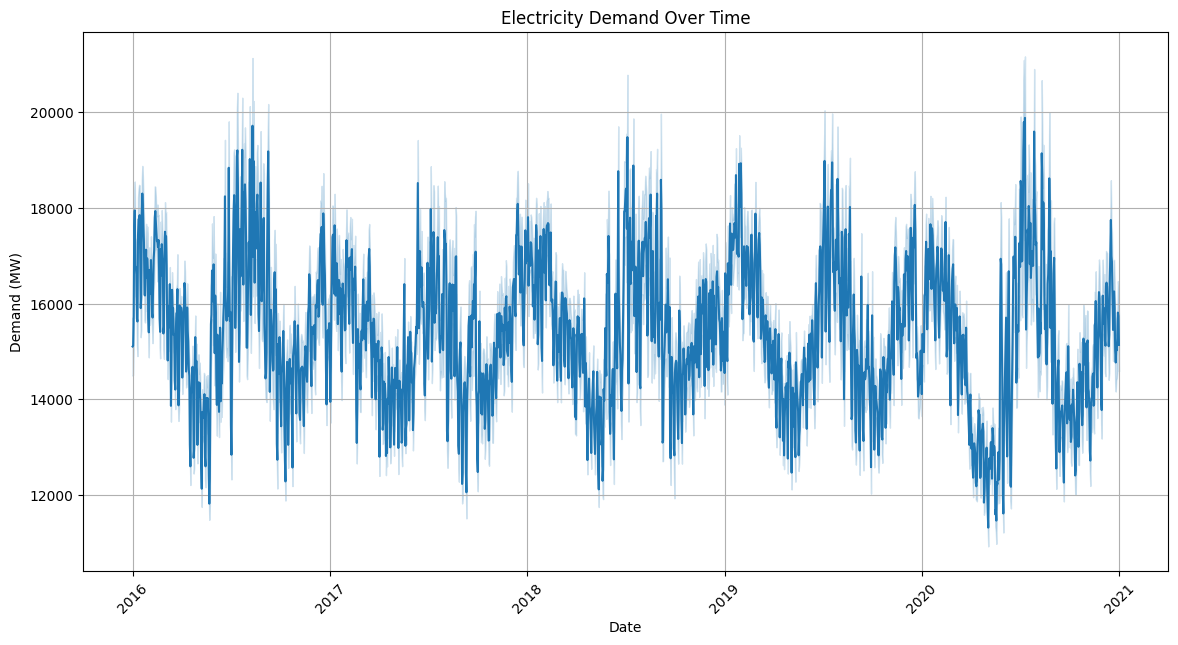

In [12]:
# Plotting electricity demand over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Ontario_Demand', data=electricity_data)
plt.title('Electricity Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The Ontario electricity demand fluctuates considerably, likely affected by seasonal trends and daily rhythms. Now, we'll graph the electricity demand across each year to gain deeper insights.

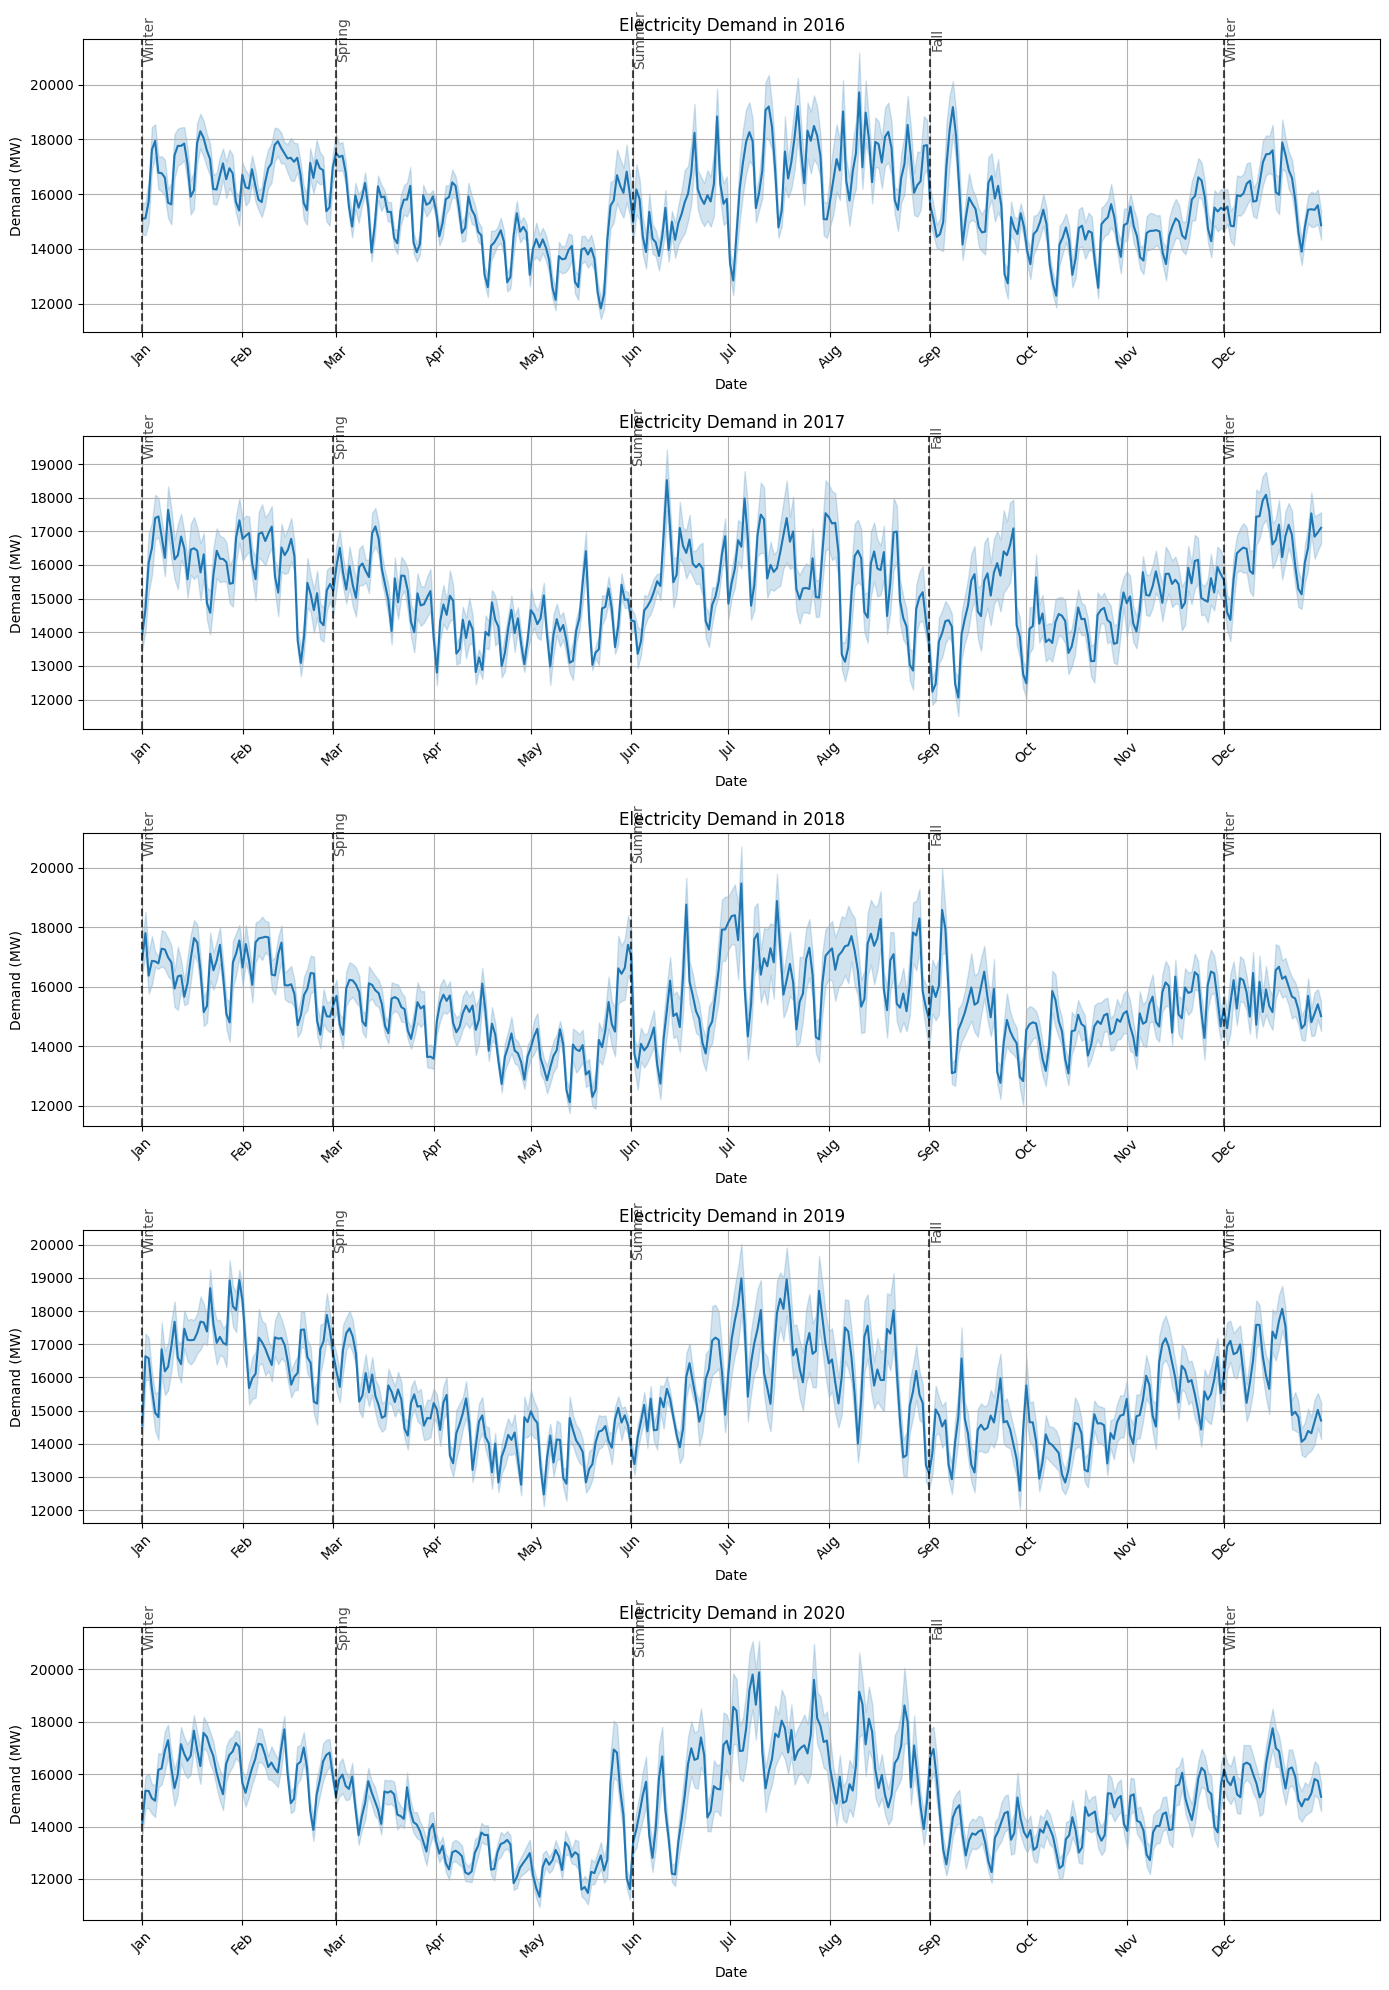

In [13]:
# Capture Yearly trends

# Extract year and month from the 'Date' column
electricity_data['Year'] = electricity_data['Date'].dt.year
electricity_data['Month'] = electricity_data['Date'].dt.month

# Define seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
electricity_data['Season'] = electricity_data['Month'].map(seasons)

years = electricity_data['Year'].unique()

# Create subplots for each year
plt.figure(figsize=(14, 20))

for i, year in enumerate(sorted(years)):
    plt.subplot(len(years), 1, i + 1)
    sns.lineplot(x='Date', y='Ontario_Demand', data=electricity_data[electricity_data['Year'] == year])
    plt.title(f'Electricity Demand in {year}')
    plt.xlabel('Date')
    plt.ylabel('Demand (MW)')
    
    # Add vertical lines for each season start
    season_start_months = [1, 3, 6, 9, 12]
    season_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']
    for month, label in zip(season_start_months, season_labels):
        season_start = pd.Timestamp(year=year, month=month, day=1)
        plt.axvline(x=season_start, color='k', linestyle='--', alpha=0.7)
        plt.text(season_start, plt.ylim()[1], label, rotation=90, verticalalignment='center', fontsize=10, alpha=0.7)
    
    # Set x-ticks to the start of each month
    months = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='MS')
    plt.xticks(months, months.strftime('%b'), rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


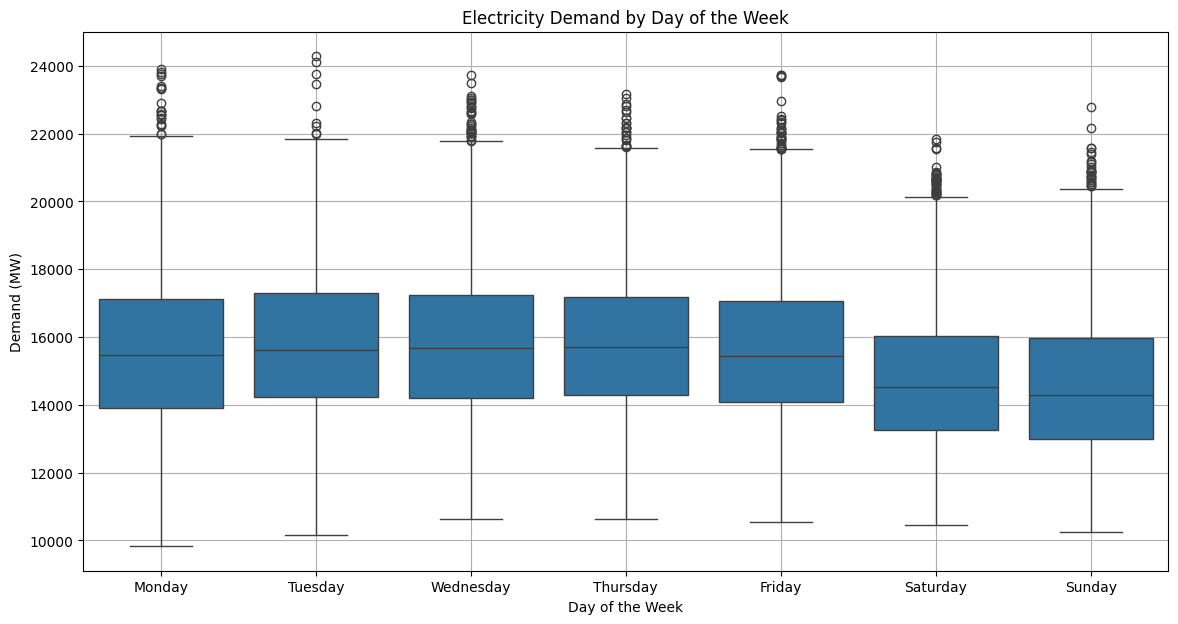

In [14]:
# Capture Daily treads within a week

# Extract the day of the week (0 = Monday, 6 = Sunday)
electricity_data['Weekday'] = electricity_data['Date'].dt.weekday

# Map weekday numbers to names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
electricity_data['Weekday_Name'] = electricity_data['Weekday'].map(weekday_names)

# Aggregate data by day of the week
aggregated_data = electricity_data.groupby(['Weekday', 'Weekday_Name'])['Ontario_Demand'].mean().reset_index()

# Create a box plot for each day of the week
plt.figure(figsize=(14, 7))
sns.boxplot(x='Weekday_Name', y='Ontario_Demand', data=electricity_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Electricity Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.show()


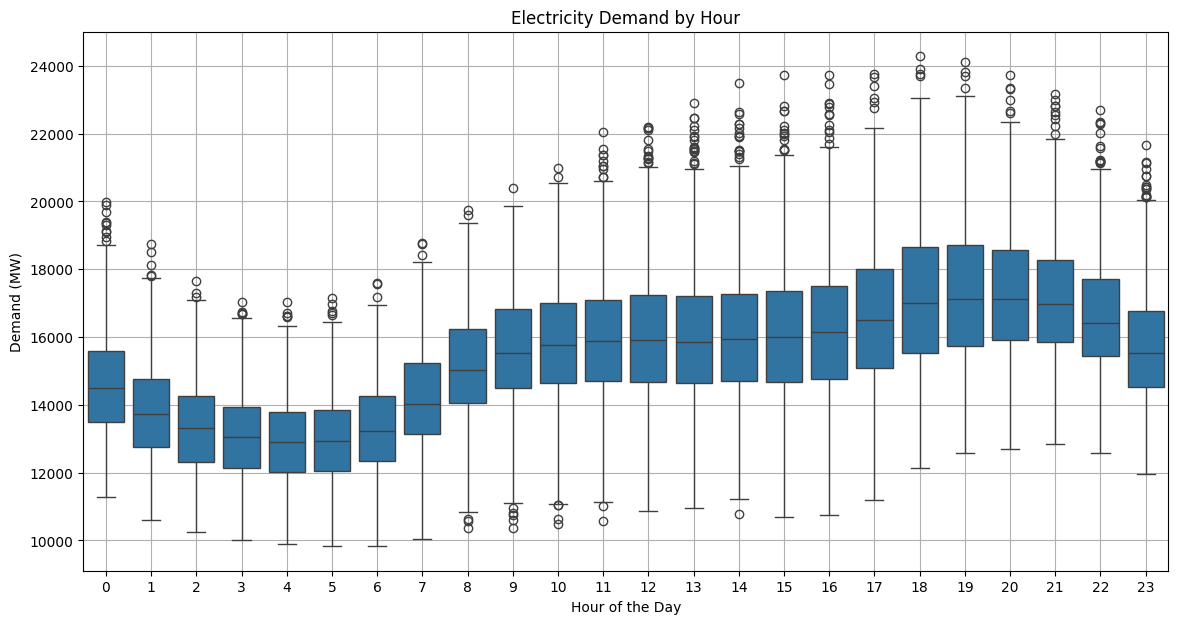

In [15]:
# Capturing Hoiurly Trends within a Day

# Plotting box plot for each hour
plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour', y='Ontario_Demand', data=electricity_data)
plt.title('Electricity Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.show()


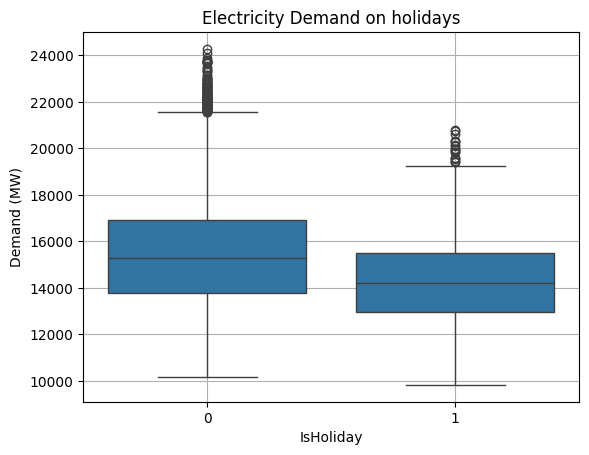

In [16]:
# Capturing Holidays trends

# Plotting box plot for Holidays vs Non-holiday days
sns.boxplot(x='IsHoliday', y='Ontario_Demand', data=electricity_data)
plt.title('Electricity Demand on holidays')
plt.xlabel('IsHoliday')
plt.ylabel('Demand (MW)')
plt.grid(True)
plt.show()


Now, we'll examine all independent variables (X) and plot their distributions to assess their characteristics.

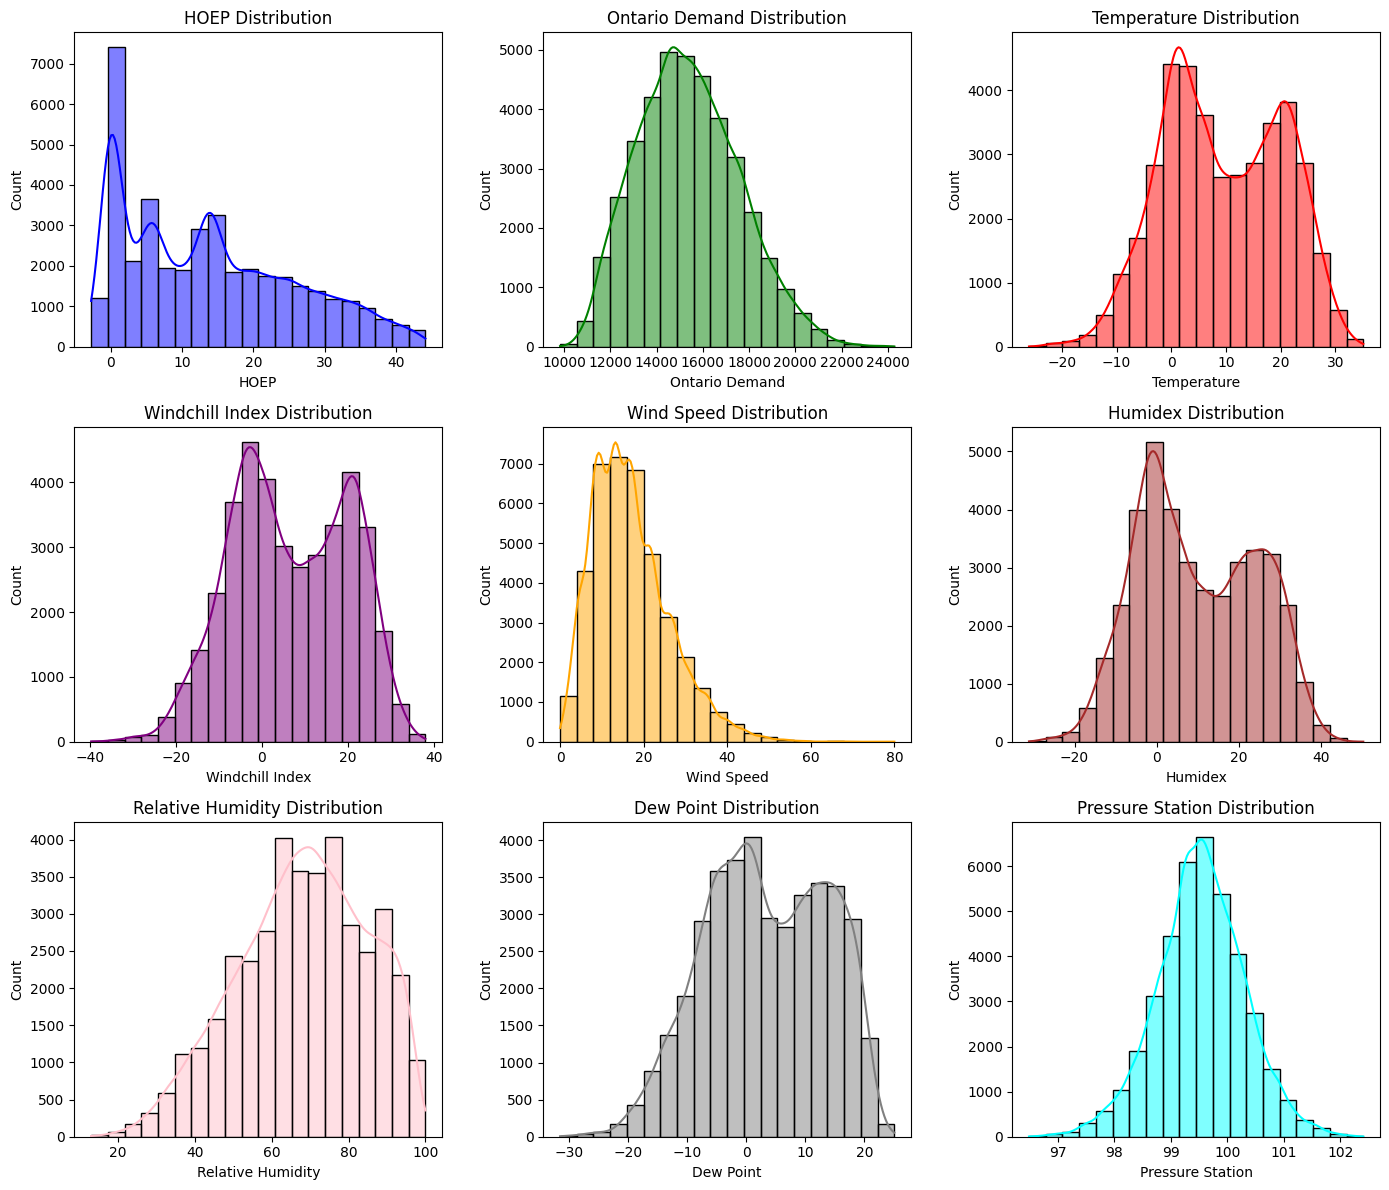

In [17]:
# Set up the figure and axis layout
plt.figure(figsize=(14, 12))

# Plotting univariate distributions for each variable
plt.subplot(3, 3, 1)
sns.histplot(electricity_data['HOEP'], bins=20, kde=True, color='blue')
plt.title('HOEP Distribution')
plt.xlabel('HOEP')

plt.subplot(3, 3, 2)
sns.histplot(electricity_data['Ontario_Demand'], bins=20, kde=True, color='green')
plt.title('Ontario Demand Distribution')
plt.xlabel('Ontario Demand')

plt.subplot(3, 3, 3)
sns.histplot(electricity_data['Temperature'], bins=20, kde=True, color='red')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')

plt.subplot(3, 3, 4)
sns.histplot(electricity_data['Windchill_Index'], bins=20, kde=True, color='purple')
plt.title('Windchill Index Distribution')
plt.xlabel('Windchill Index')

plt.subplot(3, 3, 5)
sns.histplot(electricity_data['Wind_Speed'], bins=20, kde=True, color='orange')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')

plt.subplot(3, 3, 6)
sns.histplot(electricity_data['Humidex'], bins=20, kde=True, color='brown')
plt.title('Humidex Distribution')
plt.xlabel('Humidex')

plt.subplot(3, 3, 7)
sns.histplot(electricity_data['Relative_Humidity'], bins=20, kde=True, color='pink')
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity')

plt.subplot(3, 3, 8)
sns.histplot(electricity_data['Dew_Point'], bins=20, kde=True, color='gray')
plt.title('Dew Point Distribution')
plt.xlabel('Dew Point')

plt.subplot(3, 3, 9)
sns.histplot(electricity_data['Pressure_Station'], bins=20, kde=True, color='cyan')
plt.title('Pressure Station Distribution')
plt.xlabel('Pressure Station')

plt.tight_layout()
plt.show()


## Bivariate Analysis
<a id="Bivariate-Analysis"></a>

Now, we'll examine all independent variables (X) in relation to the dependent variable (y), which is electricity demand, and plot their distributions to assess their characteristics.

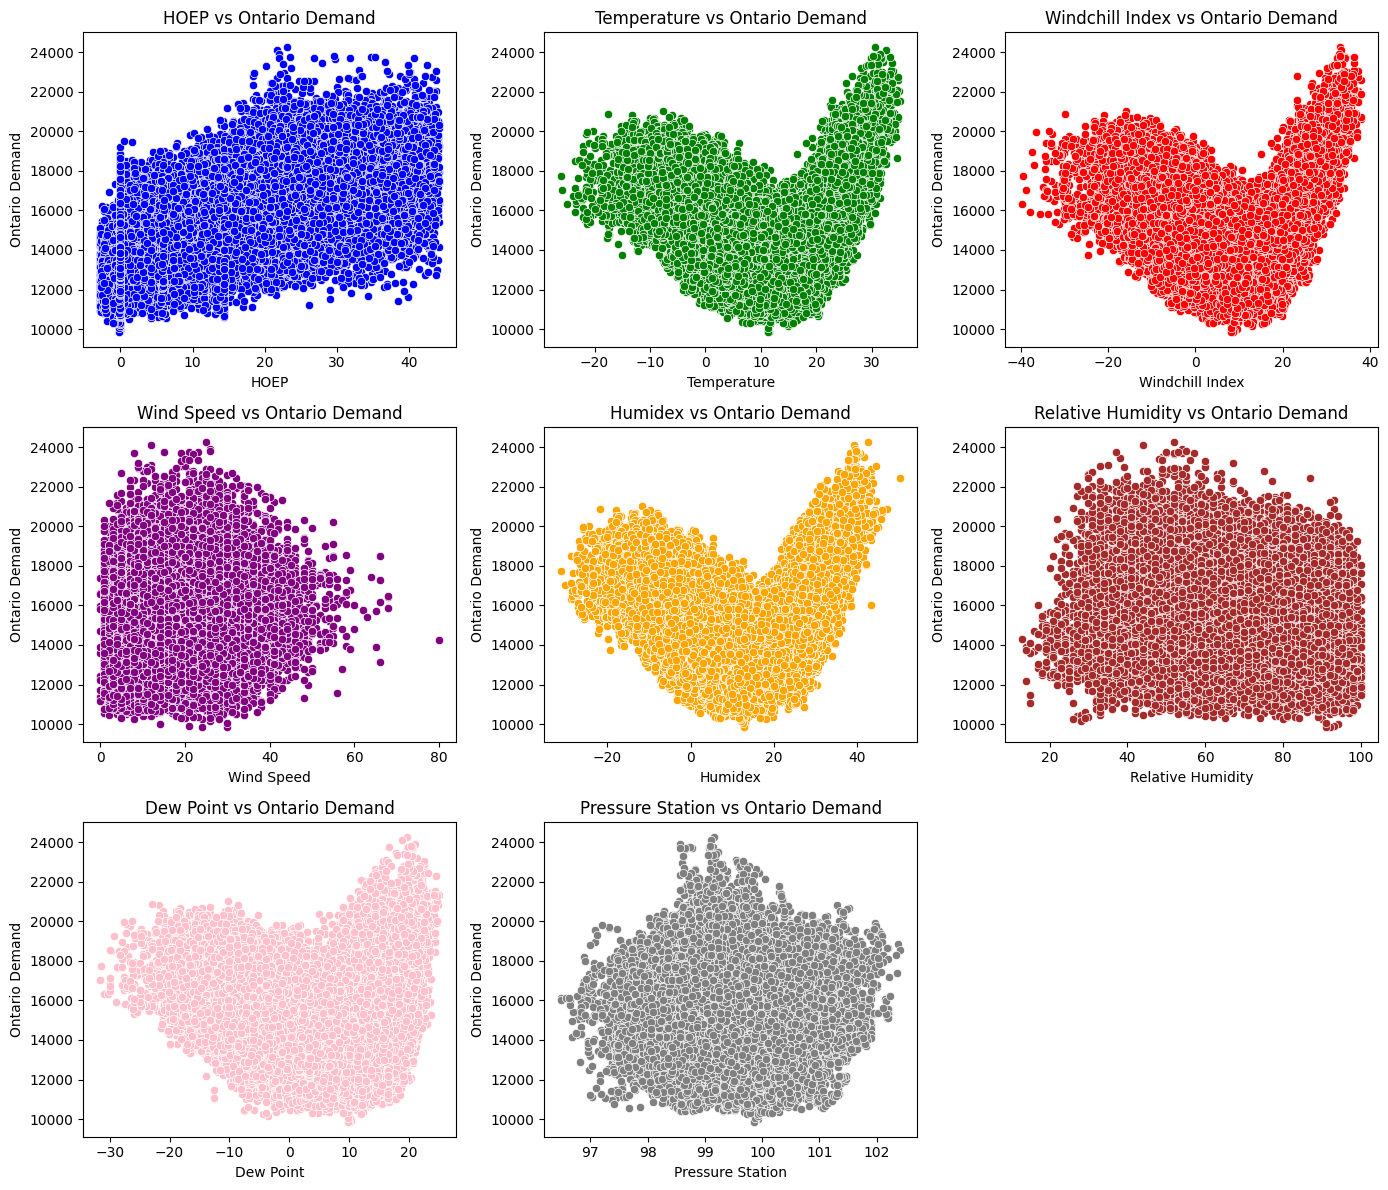

In [18]:
# Set up the figure and axis layout
plt.figure(figsize=(14, 12))

# Plotting bivariate relationships
plt.subplot(3, 3, 1)
sns.scatterplot(x='HOEP', y='Ontario_Demand', data=electricity_data, color='blue')
plt.title('HOEP vs Ontario Demand')
plt.xlabel('HOEP')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 2)
sns.scatterplot(x='Temperature', y='Ontario_Demand', data=electricity_data, color='green')
plt.title('Temperature vs Ontario Demand')
plt.xlabel('Temperature')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 3)
sns.scatterplot(x='Windchill_Index', y='Ontario_Demand', data=electricity_data, color='red')
plt.title('Windchill Index vs Ontario Demand')
plt.xlabel('Windchill Index')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 4)
sns.scatterplot(x='Wind_Speed', y='Ontario_Demand', data=electricity_data, color='purple')
plt.title('Wind Speed vs Ontario Demand')
plt.xlabel('Wind Speed')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 5)
sns.scatterplot(x='Humidex', y='Ontario_Demand', data=electricity_data, color='orange')
plt.title('Humidex vs Ontario Demand')
plt.xlabel('Humidex')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 6)
sns.scatterplot(x='Relative_Humidity', y='Ontario_Demand', data=electricity_data, color='brown')
plt.title('Relative Humidity vs Ontario Demand')
plt.xlabel('Relative Humidity')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 7)
sns.scatterplot(x='Dew_Point', y='Ontario_Demand', data=electricity_data, color='pink')
plt.title('Dew Point vs Ontario Demand')
plt.xlabel('Dew Point')
plt.ylabel('Ontario Demand')

plt.subplot(3, 3, 8)
sns.scatterplot(x='Pressure_Station', y='Ontario_Demand', data=electricity_data, color='gray')
plt.title('Pressure Station vs Ontario Demand')
plt.xlabel('Pressure Station')
plt.ylabel('Ontario Demand')

plt.tight_layout()
plt.show()


Let's check the correlation among existing features before engineering time series-related features, as we want to avoid collinearity in our data for modeling purposes.

In [19]:
# Select only numeric columns for correlation matrix
numeric_cols = electricity_data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = electricity_data[numeric_cols].corr()


In [20]:
correlation_matrix

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station,IsWeekend,IsHoliday
Hour,1.000000,0.251456,0.543581,0.119294,0.109306,0.160503,0.101408,-0.263691,0.018391,-0.026880,0.013213,0.007839
HOEP,0.251456,1.000000,0.615273,0.009442,0.020256,-0.128610,0.030895,-0.070164,-0.015680,0.164161,-0.088882,-0.065700
Ontario_Demand,0.543581,0.615273,1.000000,0.066501,0.053868,0.138297,0.087921,-0.159712,0.008641,-0.038740,-0.216940,-0.074600
Temperature,0.119294,0.009442,0.066501,1.000000,0.993878,-0.127319,0.991548,-0.205372,0.926284,-0.184491,-0.018881,-0.042110
Windchill_Index,0.109306,0.020256,0.053868,0.993878,1.000000,-0.207184,0.987675,-0.179861,0.929150,-0.163875,-0.018287,-0.042828
Wind_Speed,0.160503,-0.128610,0.138297,-0.127319,-0.207184,1.000000,-0.137766,-0.189601,-0.198264,-0.265545,-0.003320,0.017071
Humidex,0.101408,0.030895,0.087921,0.991548,0.987675,-0.137766,1.000000,-0.125058,0.950906,-0.200440,-0.018775,-0.039717
Relative_Humidity,-0.263691,-0.070164,-0.159712,-0.205372,-0.179861,-0.189601,-0.125058,1.000000,0.171680,-0.269235,-0.012009,0.035583
Dew_Point,0.018391,-0.015680,0.008641,0.926284,0.929150,-0.198264,0.950906,0.171680,1.000000,-0.280142,-0.023104,-0.030461
Pressure_Station,-0.026880,0.164161,-0.038740,-0.184491,-0.163875,-0.265545,-0.200440,-0.269235,-0.280142,1.000000,0.058092,0.015556


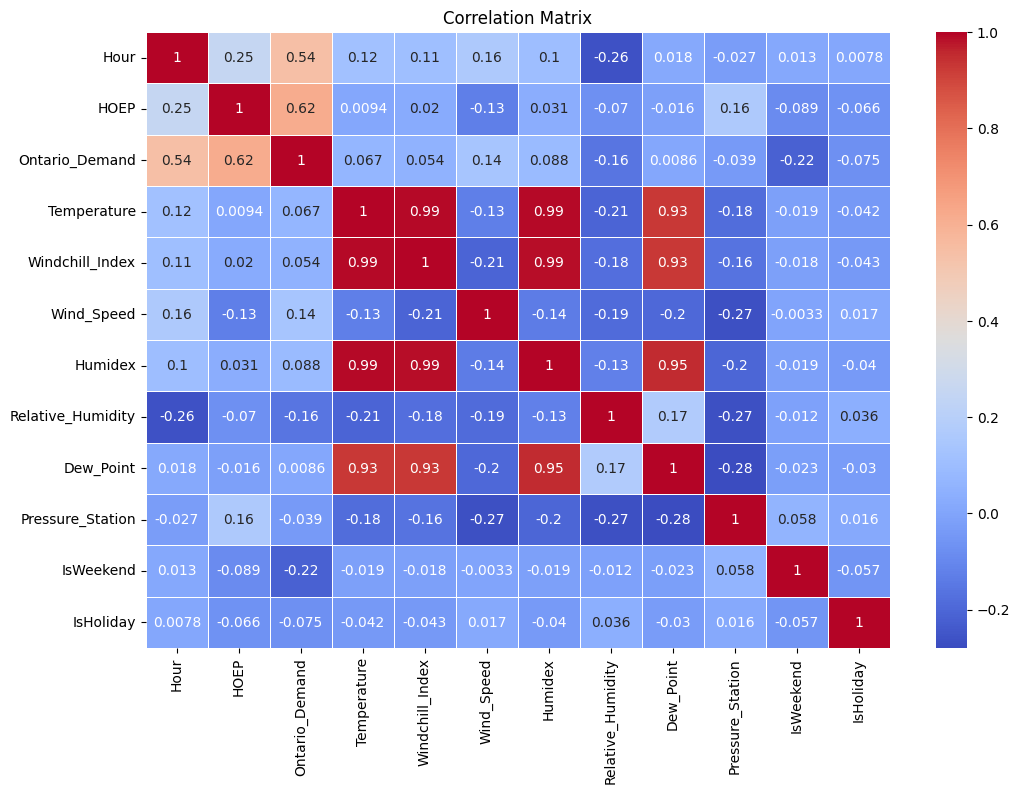

In [21]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


 **Given this is time series data for electric demand prediction, we can drop the following features**

1. Windchill_Index (highly correlated with Temperature, can be derived if needed)  
2. Humidex (highly correlated with Temperature, can be derived if needed)  
3. Dew_Point (highly correlated with Temperature and Relative_Humidity)  

For time series prediction of electric demand, we want to keep features that capture:  
a) Weather conditions affecting energy use (heating/cooling needs)  
b) Temporal patterns (daily, weekly, seasonal variations)  
c) Economic factors (like energy pricing)  

Relative_Humidity and Pressure_Station are kept as they provide additional weather information that could be relevant for demand prediction. Despite their lower correlations, IsWeekend and IsHoliday are crucial for capturing temporal patterns in energy demand.    


In [22]:
electricity_data.drop(columns=['Windchill_Index', 'Humidex', 'Dew_Point'], inplace=True)

## Time Series Feature Enginnering
<a id="Time-Series-Features-Enginnering"></a>


Now, let's create time series features such as lag, rolling mean, exponentially weighted moving average, and Fourier terms to capture seasonality for data modeling. The chosen splits and numbers are based on observed data behavior and trends.

In [23]:
# Lag features for electricity demand
lag_hours = [1, 2, 6, 12, 24, 48, 168] # one week
for lag in lag_hours:
    electricity_data[f'demand_lag_{lag}'] = electricity_data['Ontario_Demand'].shift(lag)


In [24]:
# Create rolling mean features for demand
rolling_windows = [6, 12, 24, 48, 168]
for window in rolling_windows:
    electricity_data[f'demand_rolling_mean_{window}'] = electricity_data['Ontario_Demand'].rolling(window=window, min_periods=1).mean()


In [25]:
# Create exponentially weighted moving average features
ewma_spans = [6, 12, 24, 48, 168]
for span in ewma_spans:
    electricity_data[f'EWMA_{span}'] = electricity_data['Ontario_Demand'].ewm(span=span, adjust=False).mean()


In [26]:
# Fourier terms for capturing seasonality
electricity_data['Sin_Hour'] = np.sin(2 * np.pi * electricity_data['Hour'] / 24)
electricity_data['Cos_Hour'] = np.cos(2 * np.pi * electricity_data['Hour'] / 24)

In [27]:
# Drop rows with NaN values resulting from lag features and rolling statistics
electricity_data.dropna(inplace=True)

# Conclusion

## Save Dataset for ML
<a id="Save-Dataset-for-ML"></a>

In [28]:
electricity_data.to_pickle("./data/electricity_data_pre_ml.pkl") 

## Summary Statistics
<a id="Summary Statistics"></a>

In [29]:
# Validate range for numeric columns
for column in electricity_data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{column}: min={electricity_data[column].min()}, max={electricity_data[column].max()}")

Hour: min=0, max=23
HOEP: min=-2.77, max=44.11
Ontario_Demand: min=9831, max=24281
Temperature: min=-26.0, max=35.1
Wind_Speed: min=0, max=80
Relative_Humidity: min=13, max=100
Pressure_Station: min=96.49, max=102.41
IsWeekend: min=0, max=1
IsHoliday: min=0, max=1
demand_lag_1: min=9831.0, max=24281.0
demand_lag_2: min=9831.0, max=24281.0
demand_lag_6: min=9831.0, max=24281.0
demand_lag_12: min=9831.0, max=24281.0
demand_lag_24: min=9831.0, max=24281.0
demand_lag_48: min=9831.0, max=24281.0
demand_lag_168: min=9831.0, max=24281.0
demand_rolling_mean_6: min=9982.666666666666, max=23454.333333333332
demand_rolling_mean_12: min=10466.75, max=22210.75
demand_rolling_mean_24: min=11197.583333333334, max=20351.666666666668
demand_rolling_mean_48: min=11365.604166666666, max=20030.833333333332
demand_rolling_mean_168: min=12071.410714285714, max=18463.630952380954
EWMA_6: min=10184.434103878344, max=22922.546241918666
EWMA_12: min=10612.384627593741, max=21822.15404492044
EWMA_24: min=11027.5

## Key Findings from the Analysis
<a id="Key-Findings-from-the-Analysis"></a>

1. Holiday Feature Engineering: Engineered holiday features based on data from Ontario, Canada (2016-2021) to account for their impact on electricity consumption. This enhancement helps capture seasonal variations influenced by holidays throughout the years.
2. Data Quality and Trend Analysis: Verified data quality with no outliers or problematic data points observed. The trend in electricity demand over time is consistent and logical, aligning with expected patterns.  

3. Yearly Demand Trends: Yearly plots reveal distinct seasonal patterns with higher consumption during summers and winters. Understanding these annual cycles is crucial for effectively planning and managing peak demand periods.

4. Weekly Consumption Patterns: Analysis of weekly consumption patterns highlights lower electricity demand on weekends than on weekdays. This insight aids in load forecasting and operational planning for energy providers.

5. Hourly Demand Variation: Hourly demand analysis shows peak consumption in the evening and minimal usage in the early morning hours. This hourly variation informs strategies for optimizing energy distribution and infrastructure utilization.

## Insights and Observations
<a id="Insights-and-Observations"></a>

1. Feature Selection and Correlation: Streamlined features correlated with temperature, leveraging temperature alone to explain demand variability effectively. Features like Relative Humidity and Pressure Station data were retained for their potential relevance in refining demand prediction models.

2. Temporal Feature Importance: Identified IsWeekend and IsHoliday as critical features for capturing temporal patterns in energy demand. These features enhance the model's accuracy in predicting fluctuations based on day-of-week and holiday effects.

3. Strategic Implications: The analysis provides actionable insights for energy management strategies, including optimizing resource allocation, improving load forecasting accuracy, and enhancing operational efficiency based on observed consumption patterns.